# RTED-TDS Co-Sim

NPCC Case

In [1]:
%run -i 'cosim_import.py'

0.post4562.dev0+gf3ddbf9
2.8.0


In [2]:
# if save the data to CSV
save_data = False
file_beging = 'cosim_'
sim_name = 'npcc_fict'

# case parameters
case_name = 'npcc'
caseH = 18  # start time [H] of the co-simulation
ict = True
ecc = False
agc = True

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.05

In [3]:
%run -i 'cosim_setup_andes.py'

EV1: ts=18[H], 100000 EVs, Total Q=863.7 MWh
Online 28781, Q=719.29 MWh, SoC=0.7397
Power(MW): Pt=-79.1953, Pc=-79.1953, Pd=0.0
Ctrl: 0=15464; 1=13317; 
EV1: Load A from Aest.csv.


Generating code for 1 models on 8 processes.


## Load synthetic

Create load data ``d_syn``, which is a ``DataFrame`` that have three columns: ``time``, ``s10``, ``h10``. ``time`` is by seconds, ``s10`` is scalar load.

ANDES total load is: 224.344 p.u.


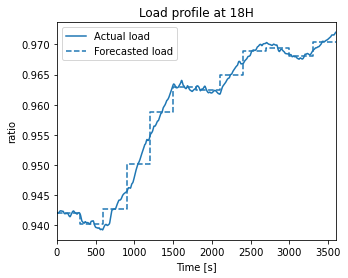

In [4]:
%run -i 'cosim_loadsyn.py'

## Setup ``ssp`` and ``ssd``

Convert ``ssa`` to pandapower net ``ssp``, add generator cost

The input cost array follow the matpower/pypower format, now only poly_cost is supported

In [5]:
%run -i 'cosim_setup_dispatch.py'

Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-08


RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=576402.303


### Make link table

## Loop

In the loop, there are mainly X parts:

- interval RTED: run DCOPF (``ssd.mdl``), run ACOPF(``ssp``), 

- interval AGC: do AGC, do dispatch with smooth setpoints

- interval PQ: alter load, run TDS(``ssa.TDS``)

Notes:

- The setpoints for DG are coded but not verified yet.

- After the development of ANDES control room, the dispatch and AGC part can be refactored.

- interface variables: ``DG.pmx``: DPV profile, ``DG.pref0``: setpoints, ``DG.pext0``: AGC

- ACOPF in pandapower considered generator limtis of ramping and SFR reserve

Loop

In [6]:
%run -i 'cosim_main.py'

  0%|                                                                                                                                                    | 0/3600 [00:00<?, ?it/s]RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED is solved.
RTED: total cost=576378.021
  8%|███████████▌                                                                                                                              | 300/3600 [00:36<06:44,  8.16it/s]RTED GB model is loaded.
RTED is solved.
RTED: total cost=576377.588
 17%|███████████████████████                                                                                                                   | 600/3600 [01:16<08:17,  6.03it/s]RTED GB model is loaded.
RTED is solved.
RTED: total cost=576376.132
 25%|██████████████████████████████████▌                                                                                                       | 900/3600 [02:00<06:30,  6.91it/s]RTED GB model is loaded.
RTED is solved.
RTED: t

In [39]:
ssp.gen

,name,slack,bus,p_mw,vm_pu,controllable,in_service,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight,scaling,sn_mva
0,PV_1,False,20,390.0,1.0486,True,True,100,0.2,1500.0,-100.0,0.0,1,100
1,PV_2,False,21,379.2,1.0593,True,True,100,0.2,1400.0,-100.0,0.0,1,100
2,PV_3,False,22,165.99,1.0157,True,True,100,0.2,600.0,-100.0,0.0,1,100
3,PV_4,False,22,135.81,1.0157,True,True,100,0.2,600.0,-100.0,0.0,1,100
4,PV_5,False,23,420.0,1.07625,True,True,100,0.2,1600.0,-100.0,0.0,1,100
5,PV_6,False,24,336.0,1.06,True,True,100,0.2,1300.0,-100.0,0.0,1,100
6,PV_7,False,25,480.0,1.0455,True,True,100,0.2,1800.0,-100.0,0.0,1,100
7,PV_8,False,26,324.0,1.0455,True,True,100,0.2,1200.0,-100.0,0.0,1,100
8,PV_9,False,35,332.4,1.0486,True,True,100,0.2,1300.0,-100.0,0.0,1,100
9,PV_10,False,41,222.0,1.04,True,True,100,0.2,800.0,-100.0,0.0,1,100


In [34]:
ssp.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,390.000000,230.919118,-44.825592,1.04860
1,379.200000,227.812224,-52.559460,1.05930
2,165.990000,3.294621,-53.978163,1.01570
3,135.810000,3.294621,-53.978163,1.01570
4,420.000000,131.252536,-50.515501,1.07625
5,336.000000,126.283292,-48.579064,1.06000
6,480.000000,75.581961,-54.298110,1.04550
7,324.000000,153.382845,-50.485461,1.04550
8,332.400000,291.068174,-44.344718,1.04860
9,222.000000,398.615501,-63.830275,1.04000


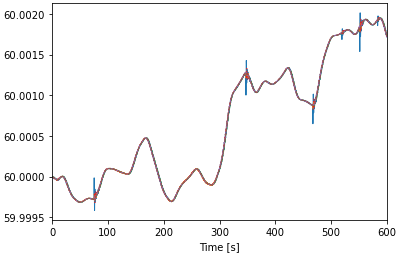

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [7]:
fig, ax = plt.subplots(1, 1)
ssa.TDS.plt.plot(ssa.COI.omega, fig=fig, ax=ax, right=600, ytimes=60, style=['science'], dpi=200, legend=False)

(<Figure size 432x216 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

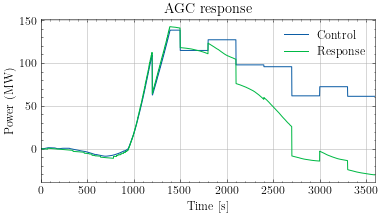

In [8]:
sse.plot_agc(style='science')

IndexError: list index out of range

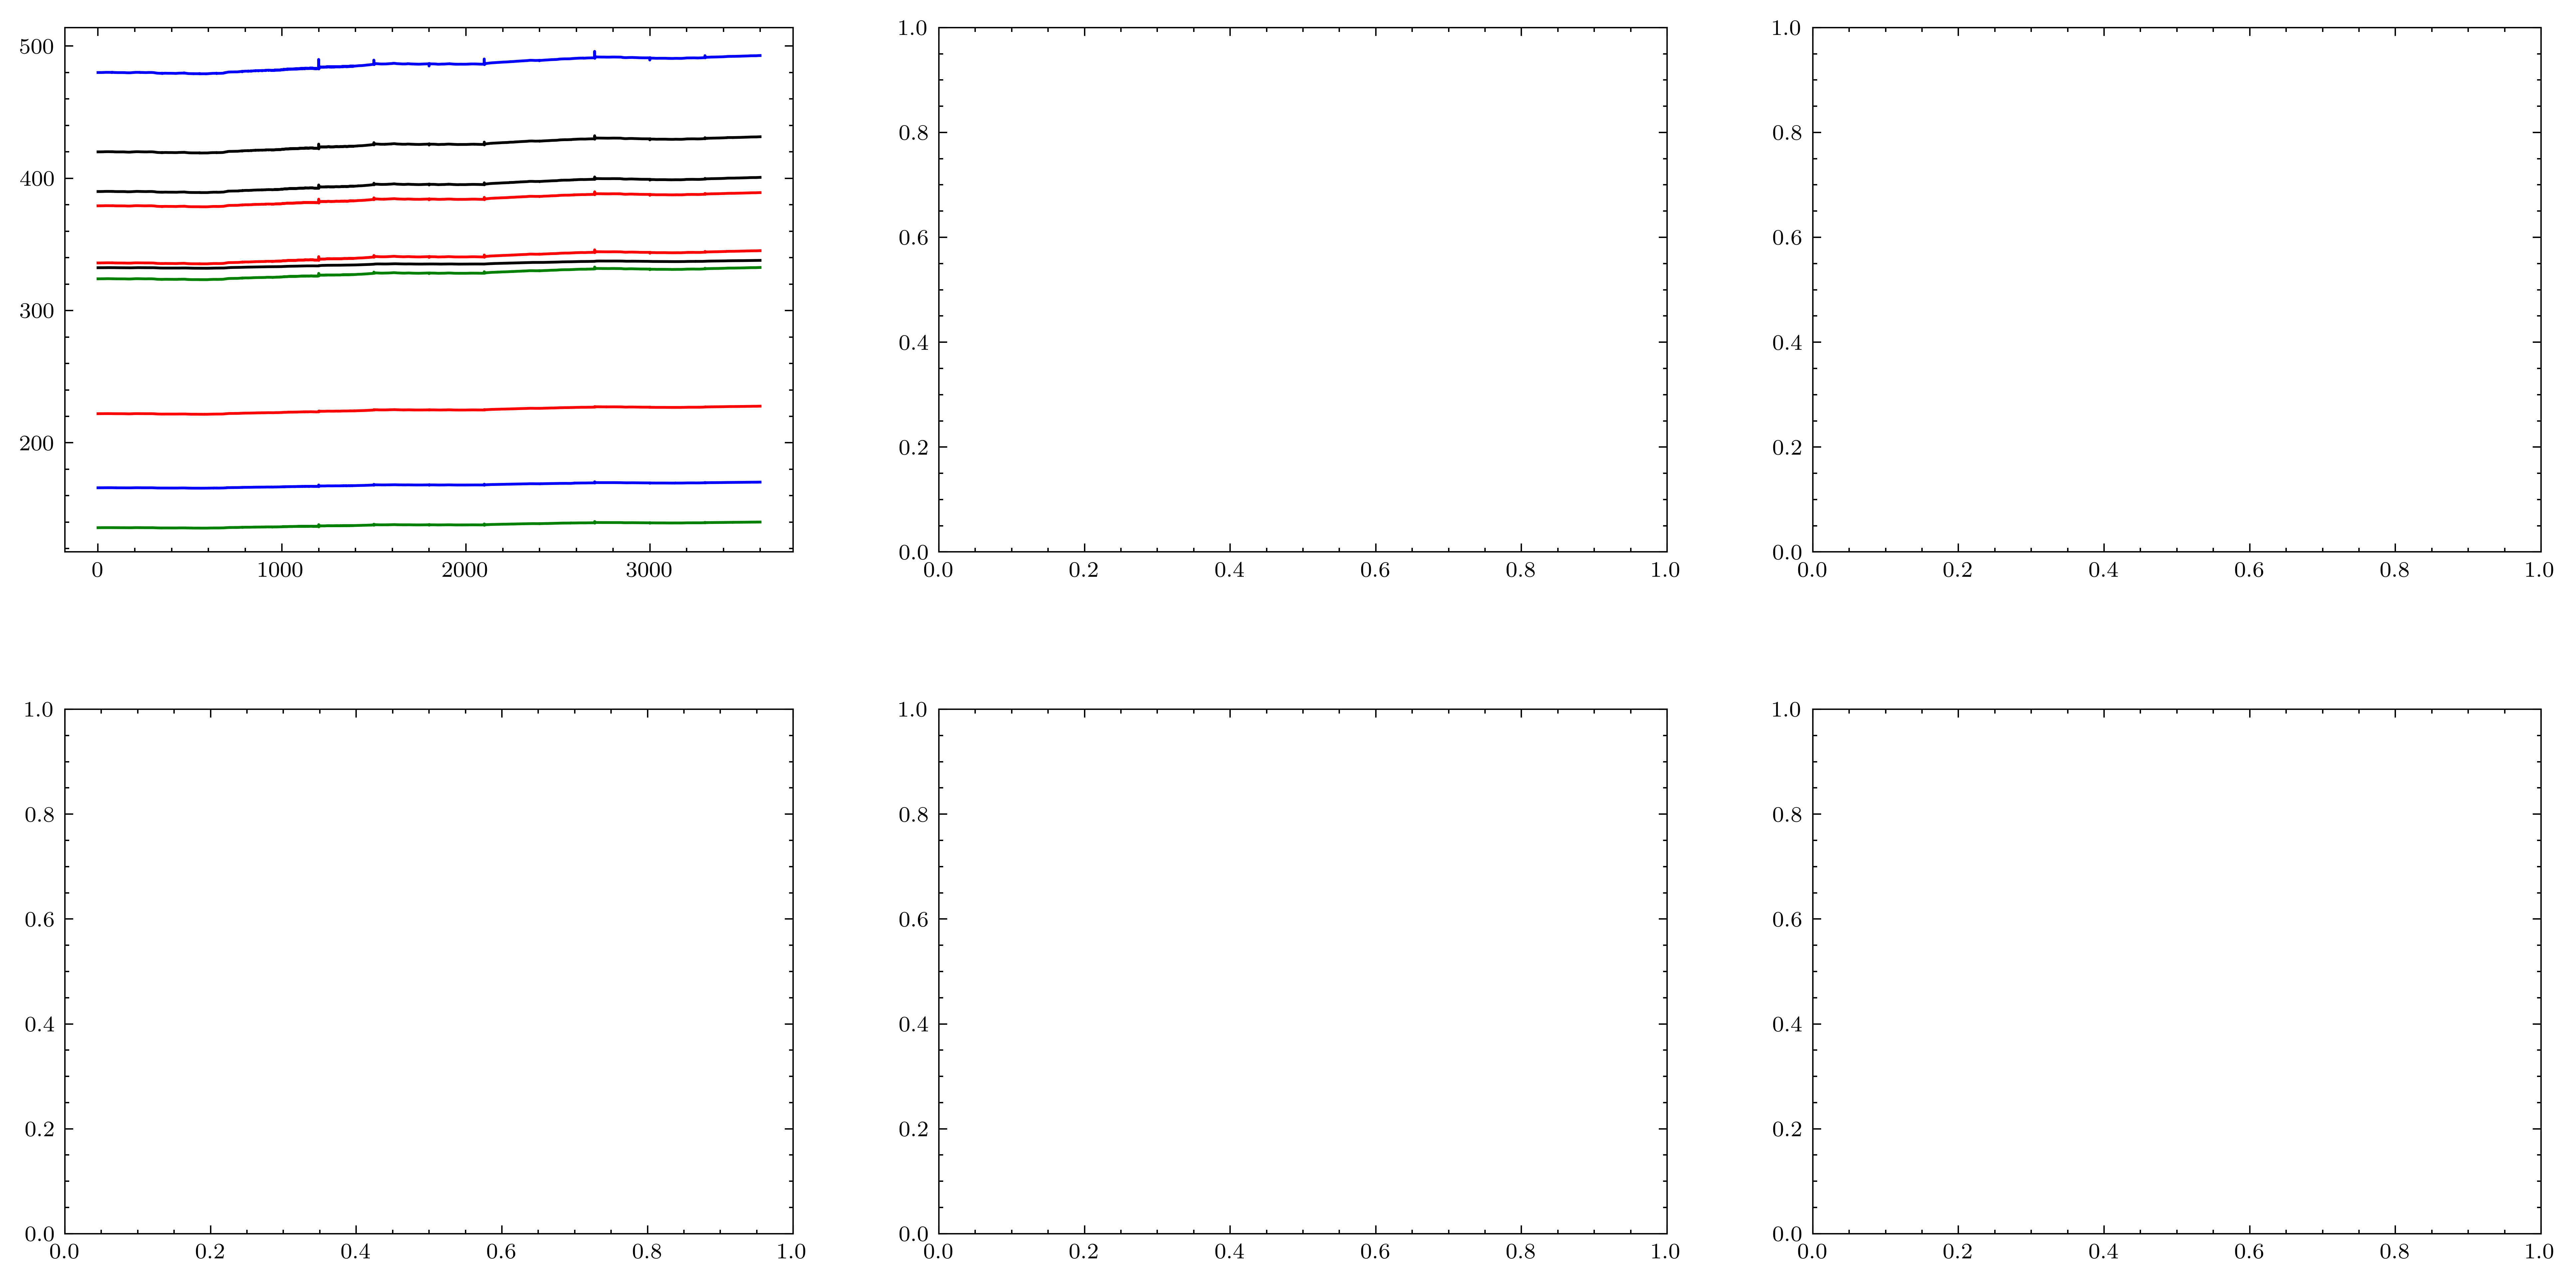

In [9]:
%run -i 'cosim_plot.py'

In [10]:
# --- save output ---
file_beging = 'cosim_'
sim_name = 'npcc_f'

cosim_out.to_csv(file_beging + sim_name + '_out.csv', index=False)
sse_out.to_csv(file_beging + sim_name + '_sse.csv', index=False)
bu_df.to_csv(file_beging + sim_name + '_bu.csv', index=False)
bd_df.to_csv(file_beging + sim_name + '_bd.csv', index=False)
pg_df.to_csv(file_beging + sim_name + '_pg.csv', index=False)
agc_mile.to_csv(file_beging + sim_name + '_agcm.csv', index=False)
sfr_res.to_csv(file_beging + sim_name + '_sfr.csv', index=False)
ev_agc.to_csv(file_beging + sim_name + '_evagc.csv', index=False)
ev_soc.iloc[0:800].to_csv(file_beging + sim_name + '_evsoc1.csv', index=False)
ev_soc.iloc[800:].to_csv(file_beging + sim_name + '_evsoc2.csv', index=False)
sse.ev.to_csv(file_beging + sim_name + '_evdata.csv', index=False)

import csv
new_path = open(file_beging + sim_name + '_rted.csv', 'w')
z = csv.writer(new_path)
for new_k, new_v in rted_res.items():
    z.writerow([new_k, new_v])
new_path.close()

NameError: name 'cosim_out' is not defined